# Results analysis

## Load data
expected file structure:
```
results/
    adagrad/
        0.1/
            BC2GM.pickle
            BC4CHEMD.pickle
            BC5CDR-chem.pickle
            BC5CDR-disease.pickle
            JNLPBA.pickle
            NCBI.pickle
        0.01/
            ..
        0.001/
            ..
    adam/
       ..
    rmsprop/
        ..
```


In [1]:
from pathlib import Path

results_directory = Path('results/')
optimizers = ['adagrad', 'adam', 'rmsprop']
lrs = ['0.1', '0.01', '0.001']
datasets = ['BC2GM', 'BC4CHEMD', 'BC5CDR-chem', 'BC5CDR-disease', 'JNLPBA', 'NCBI']

In [2]:
import pickle
from collections import defaultdict
import matplotlib.pyplot as plt

data = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))

for optimizer in optimizers:
    for lr in lrs:
        for dataset in datasets:
            path = results_directory / optimizer / lr / f'{dataset}.pickle'
            with open(path, 'rb') as file:
                model_dict = pickle.load(file)
                # model dict contain one key, get its value
                model_dict = model_dict[list(model_dict.keys())[0]]
                data[dataset][optimizer][lr] = model_dict

## Contents overview

In [3]:
data['BC2GM']['rmsprop']['0.001'].keys()

dict_keys(['trainLossList', 'testLossList', 'trainDurationList', 'testDurationList', 'f1ValList', 'precisionValList', 'recallValList', 'maxF1', 'maxF1idx', 'prevF1', 'stop_counter', 'early_stop', 'm_name'])

## Loss plot

In [4]:
def make_loss_plot(metrics_dict, title, ax=None):
    if ax is None:
        plt.figure(figsize=(10, 6))
        
    for learning_rate, metrics in metrics_dict.items():
        trainLossList = metrics['trainLossList']
        testLossList = metrics['testLossList']
        
        epochs = list(range(1, len(trainLossList) + 1))
        
        label_train = f'Training Loss (lr={learning_rate})'
        label_test = f'Testing Loss (lr={learning_rate})'
        
        if ax is None:
            plt.plot(epochs, trainLossList, label=label_train)
            plt.plot(epochs, testLossList, label=label_test)
        else:
            ax.plot(epochs, trainLossList, label=label_train)
            ax.plot(epochs, testLossList, label=label_test)
    
    if ax is None:
        plt.title(title)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        ax.set_title(title)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.legend()
        ax.grid(True)

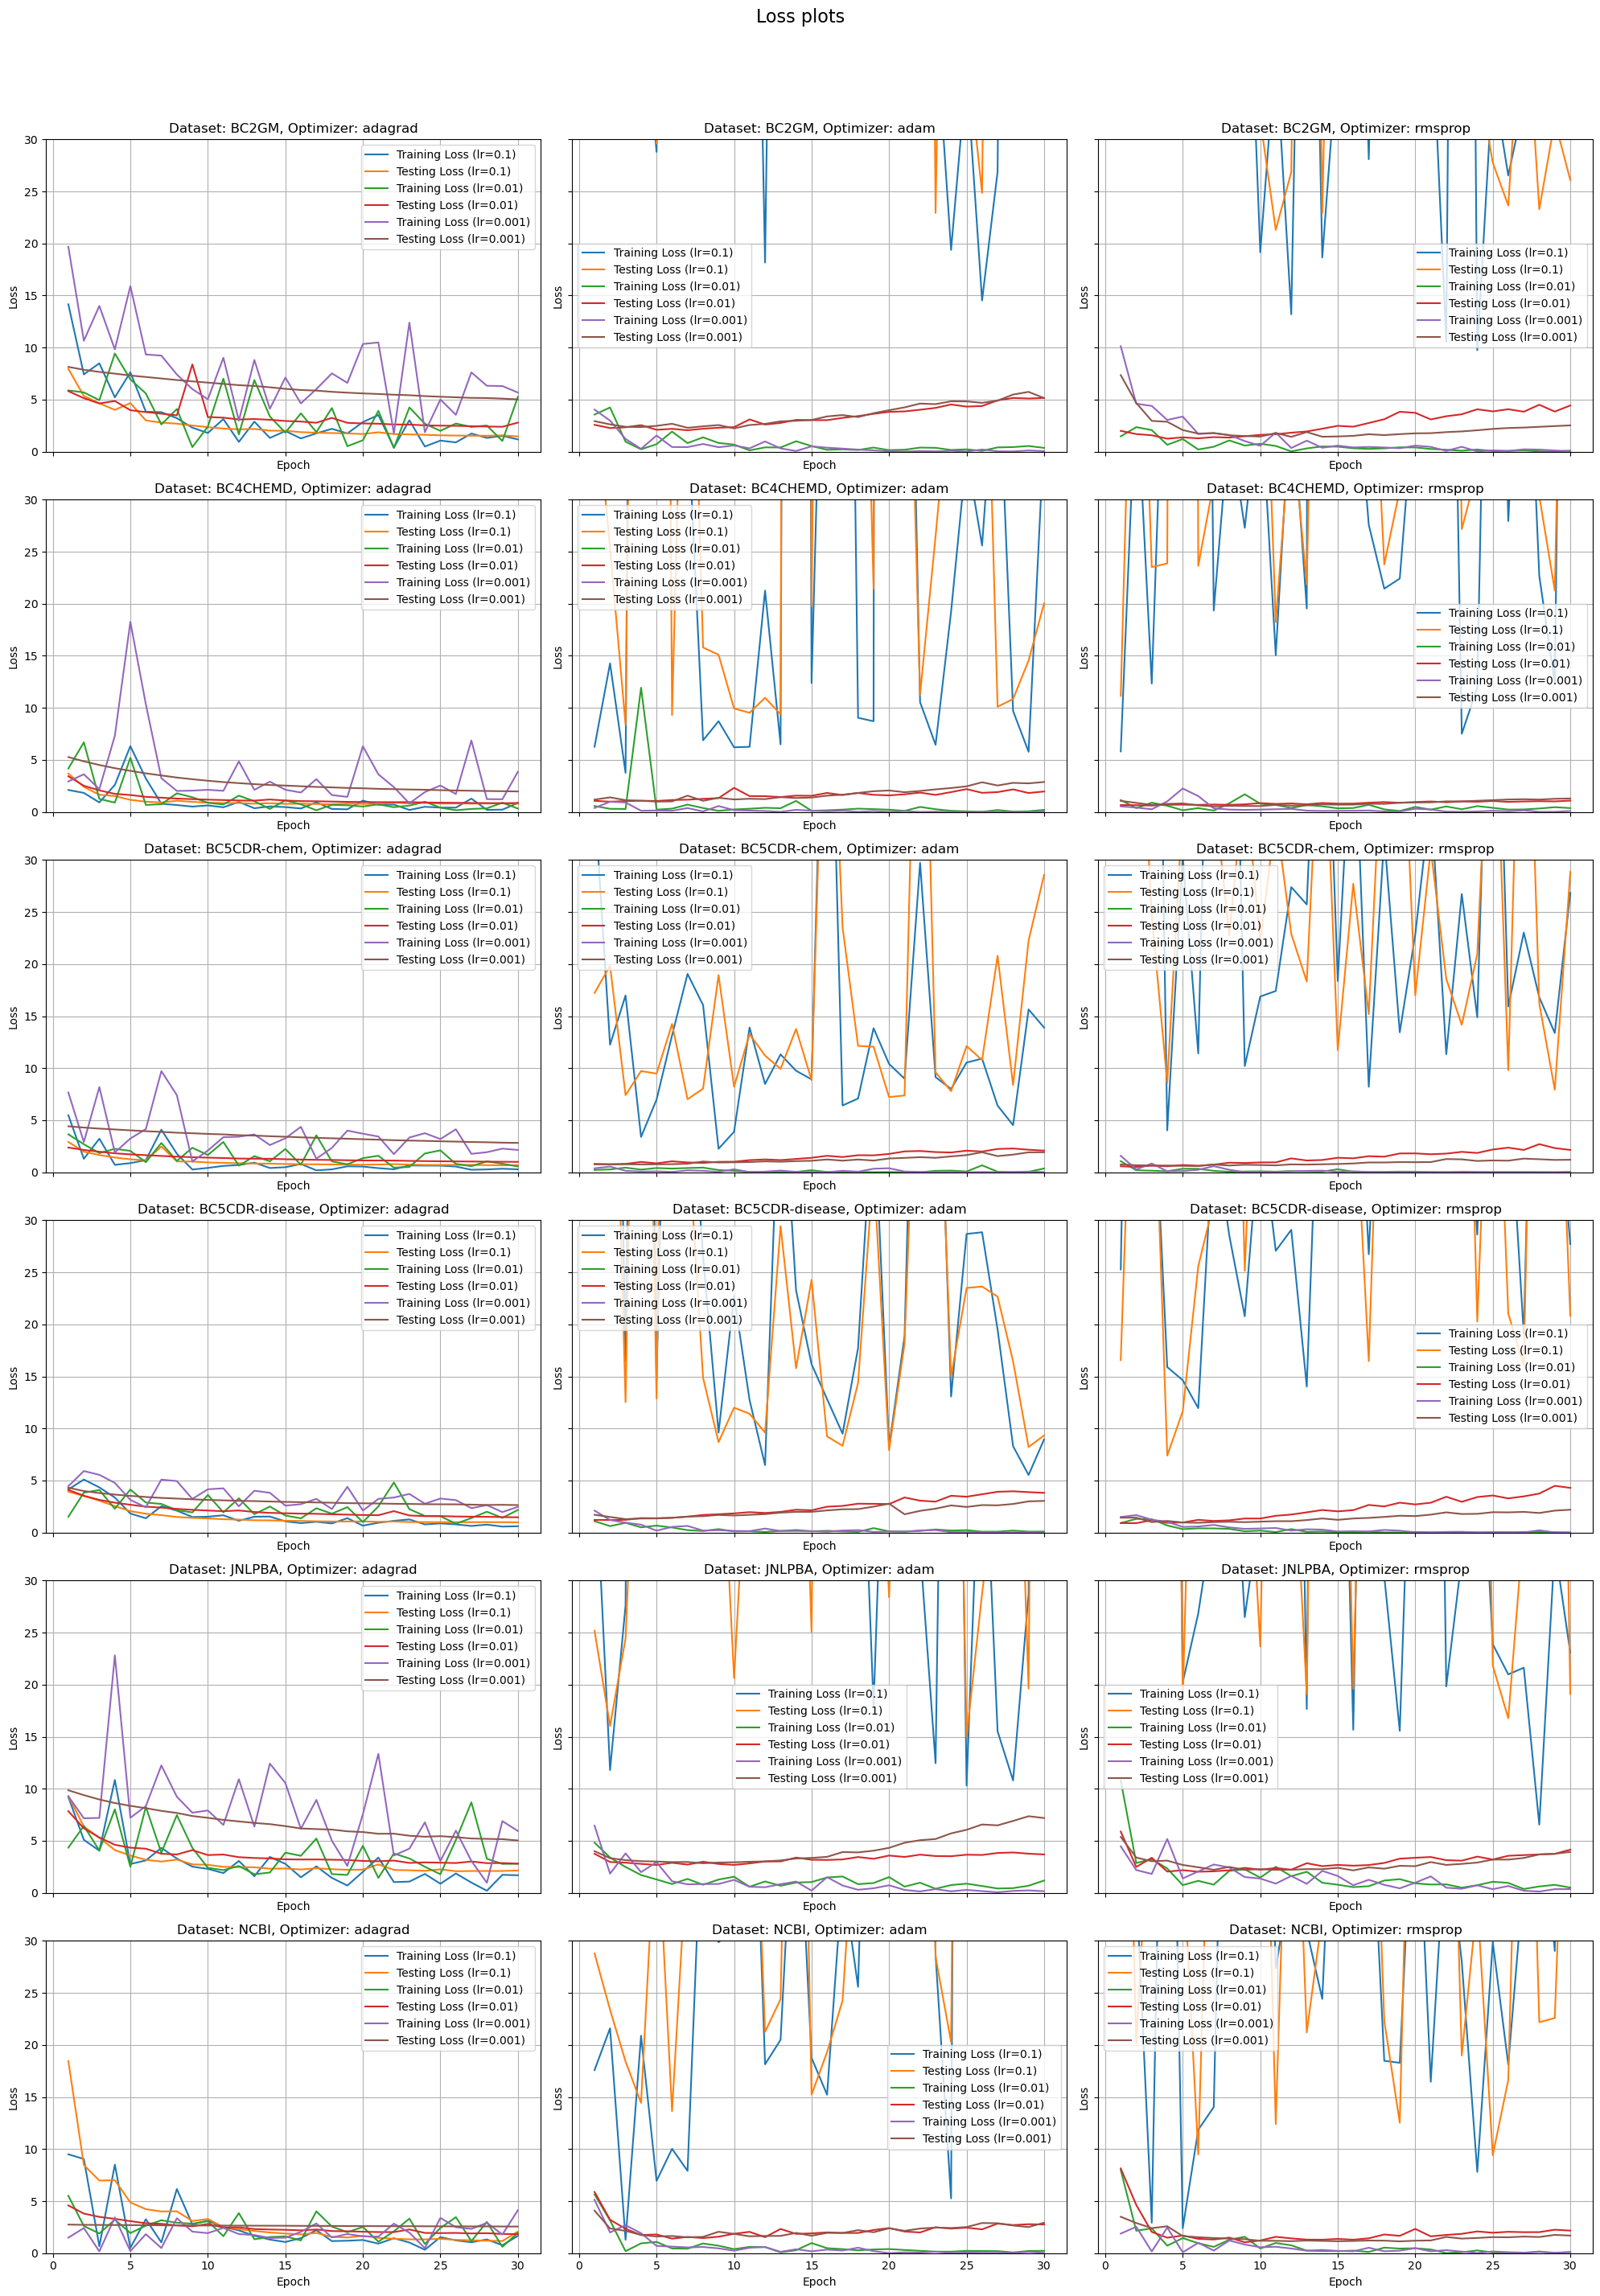

In [5]:
fig, axs = plt.subplots(figsize=(20, 5 * len(datasets)), nrows=len(datasets), ncols=len(optimizers), sharey=True, sharex=True)
plt.suptitle('Loss plots', fontsize=16)
plt.ylim(0, 30)

for j, dataset in enumerate(datasets):
    for i, optimizer in enumerate(optimizers):
        if dataset in data and optimizer in data[dataset]:
            make_loss_plot(data[dataset][optimizer], f'Dataset: {dataset}, Optimizer: {optimizer}', ax=axs[j, i])

# Save all plots to pdf
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle
plt.savefig('loss_plots.pdf')

In [6]:
data['BC2GM']['rmsprop']['0.001'].keys()

dict_keys(['trainLossList', 'testLossList', 'trainDurationList', 'testDurationList', 'f1ValList', 'precisionValList', 'recallValList', 'maxF1', 'maxF1idx', 'prevF1', 'stop_counter', 'early_stop', 'm_name'])

## Duration plot

In [7]:
def make_loss_plot(metrics_dict, title, ax=None):
    if ax is None:
        plt.figure(figsize=(10, 6))
        
    for learning_rate, metrics in metrics_dict.items():
        trainLossList = metrics['trainDurationList']
        testLossList = metrics['testDurationList']
        
        epochs = list(range(1, len(trainLossList) + 1))
        
        label_train = f'Training Duration (lr={learning_rate})'
        label_test = f'Testing Duration (lr={learning_rate})'
        
        if ax is None:
            plt.plot(epochs, trainLossList, label=label_train)
            plt.plot(epochs, testLossList, label=label_test)
            plt.ylim([0, 80])
        else:
            ax.plot(epochs, trainLossList, label=label_train)
            ax.plot(epochs, testLossList, label=label_test)
            ax.set_ylim([0, 80])
    
    if ax is None:
        plt.title(title)
        plt.xlabel('Epoch')
        plt.ylabel('Duration')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        ax.set_title(title)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Duration')
        ax.legend()
        ax.grid(True)

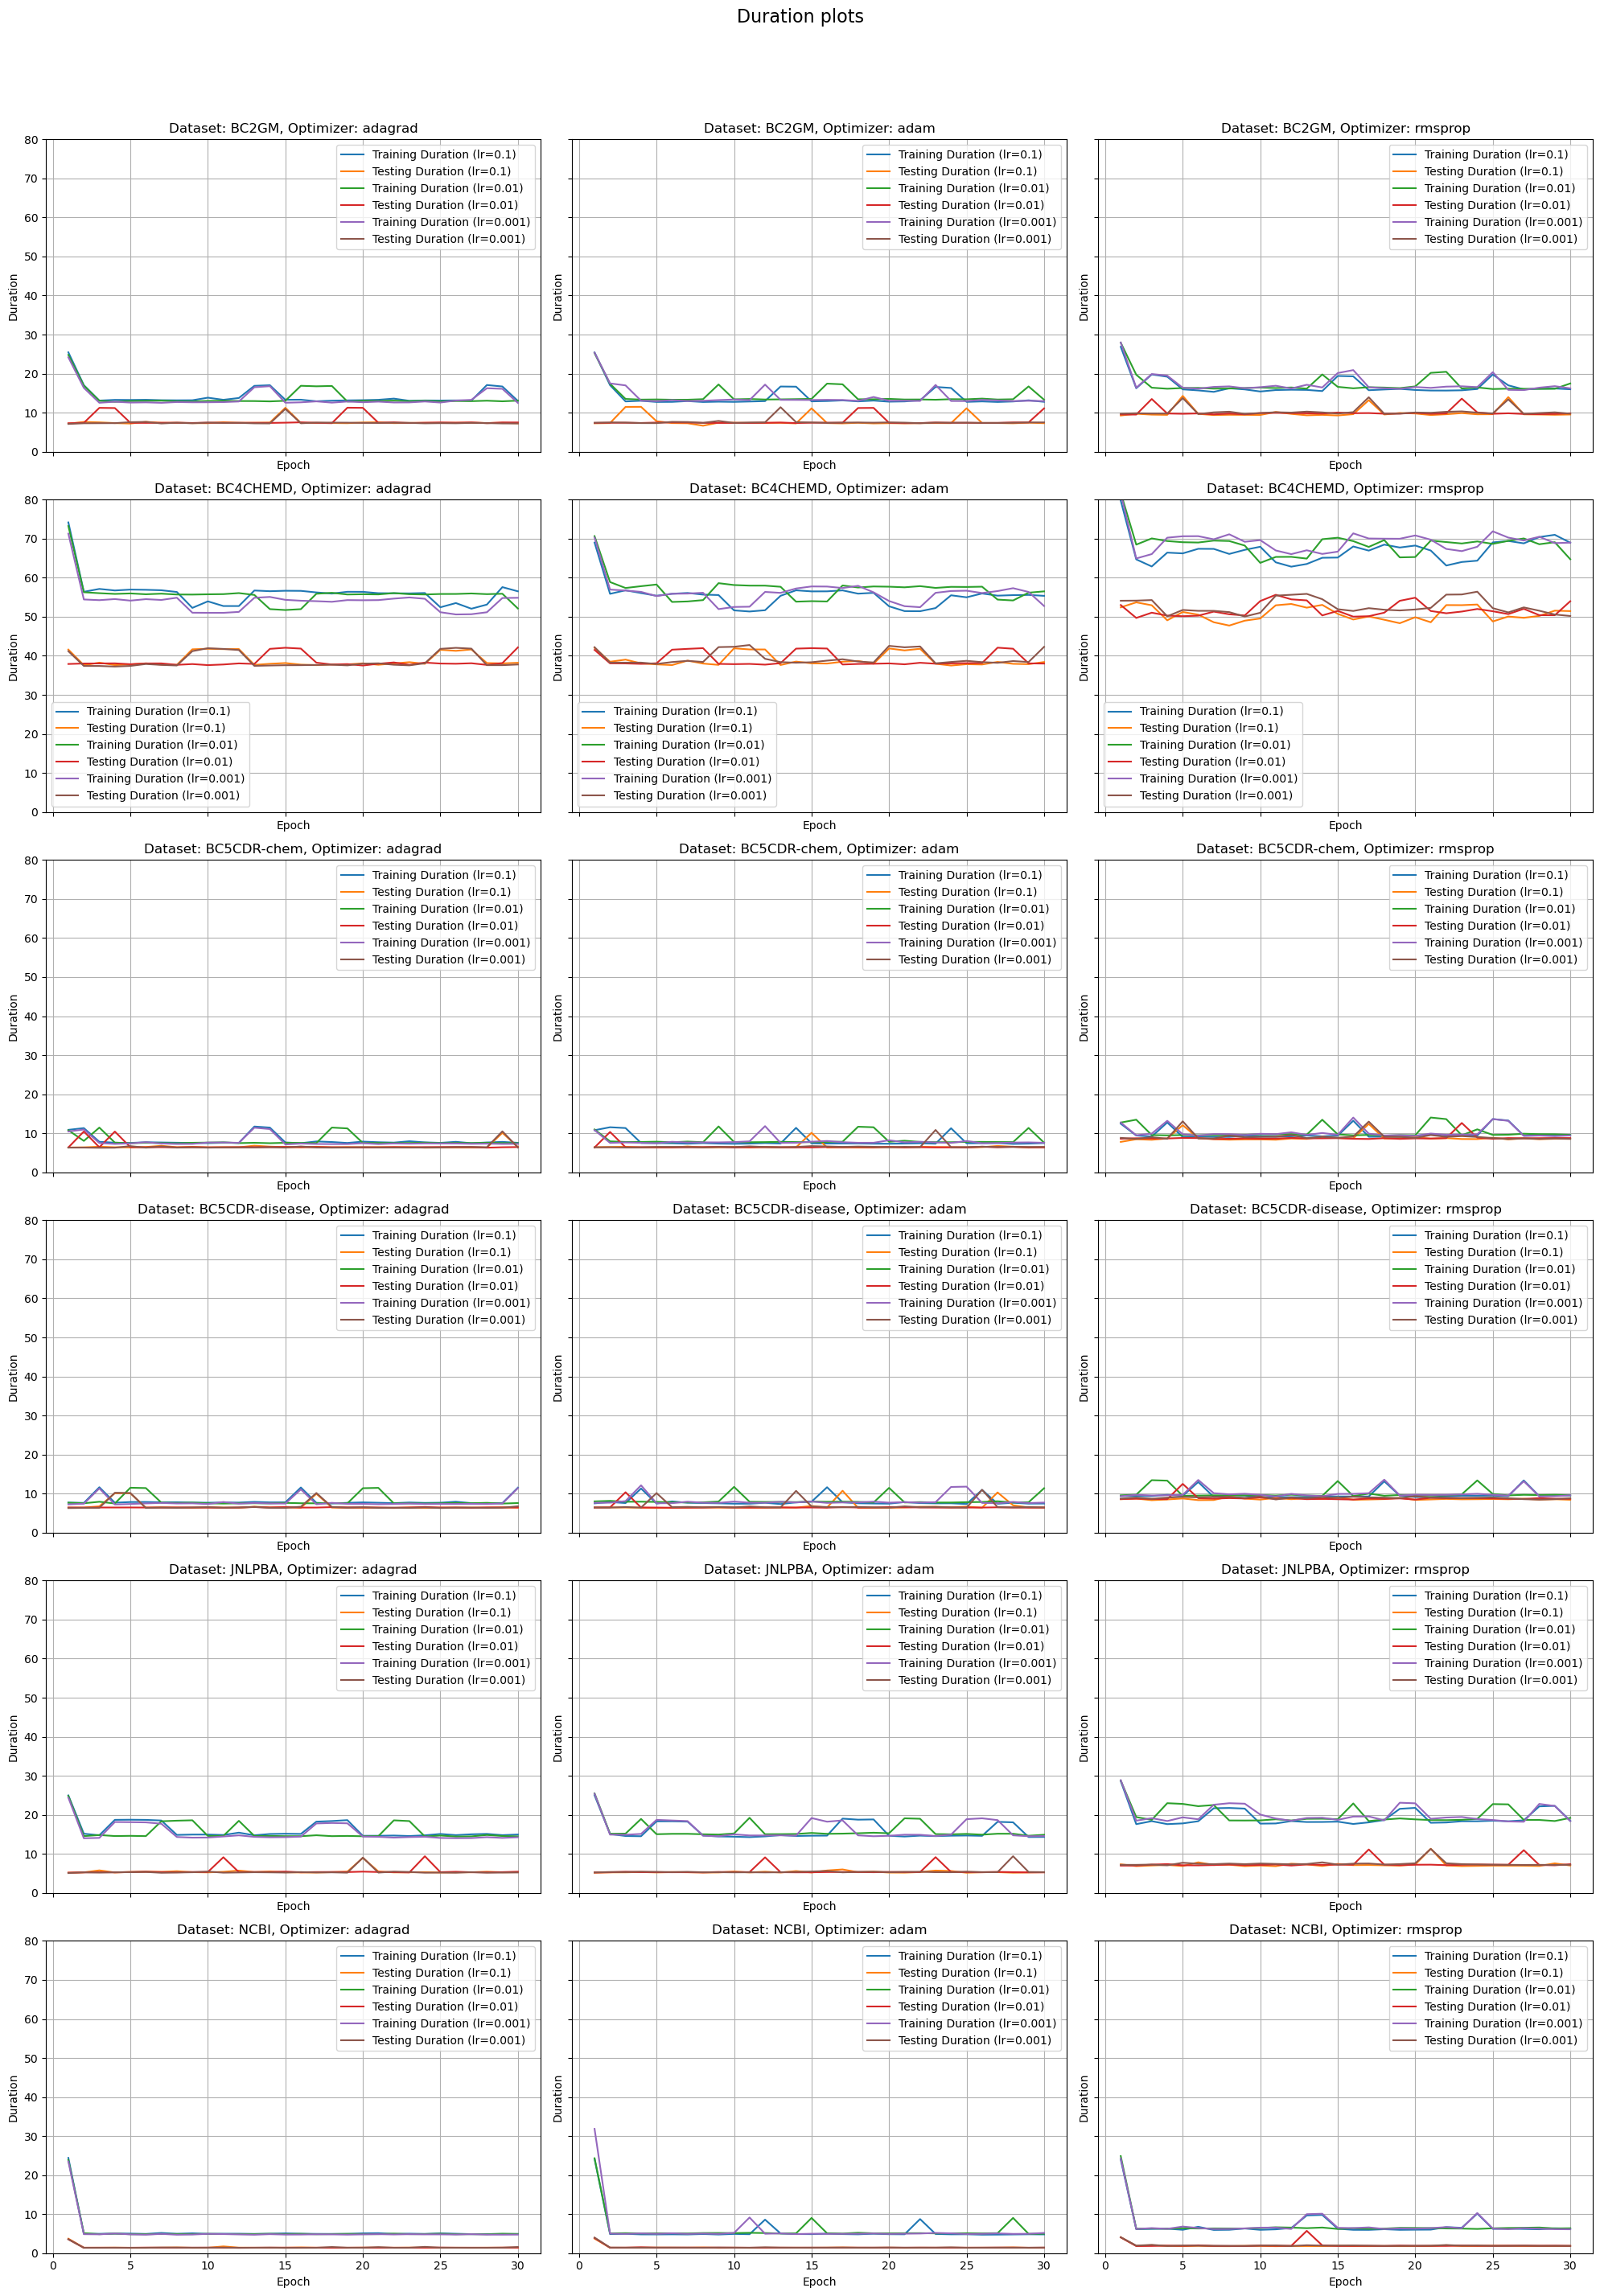

In [8]:
fig, axs = plt.subplots(figsize=(20, 5 * len(datasets)), nrows=len(datasets), ncols=len(optimizers), sharey=True, sharex=True)
plt.suptitle('Duration plots', fontsize=16)

for j, dataset in enumerate(datasets):
    for i, optimizer in enumerate(optimizers):
        if dataset in data and optimizer in data[dataset]:
            make_loss_plot(data[dataset][optimizer], f'Dataset: {dataset}, Optimizer: {optimizer}', ax=axs[j, i])

# Save all plots to pdf
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle
plt.savefig('duration_plots.pdf')

## F1 score plot

In [9]:
def make_loss_plot(metrics_dict, title, ax=None):
    if ax is None:
        plt.figure(figsize=(10, 6))
        
    for learning_rate, metrics in metrics_dict.items():
        f1ValList = metrics['f1ValList']
        
        epochs = list(range(1, len(f1ValList) + 1))
        
        label = f'F1 score (lr={learning_rate})'
        if ax is None:
            plt.plot(epochs, f1ValList, label=label)
        else:
            ax.plot(epochs, f1ValList, label=label)
    
    if ax is None:
        plt.title(title)
        plt.xlabel('Epoch')
        plt.ylabel('F1 score')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        ax.set_title(title)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('F1 score')
        ax.legend()
        ax.grid(True)

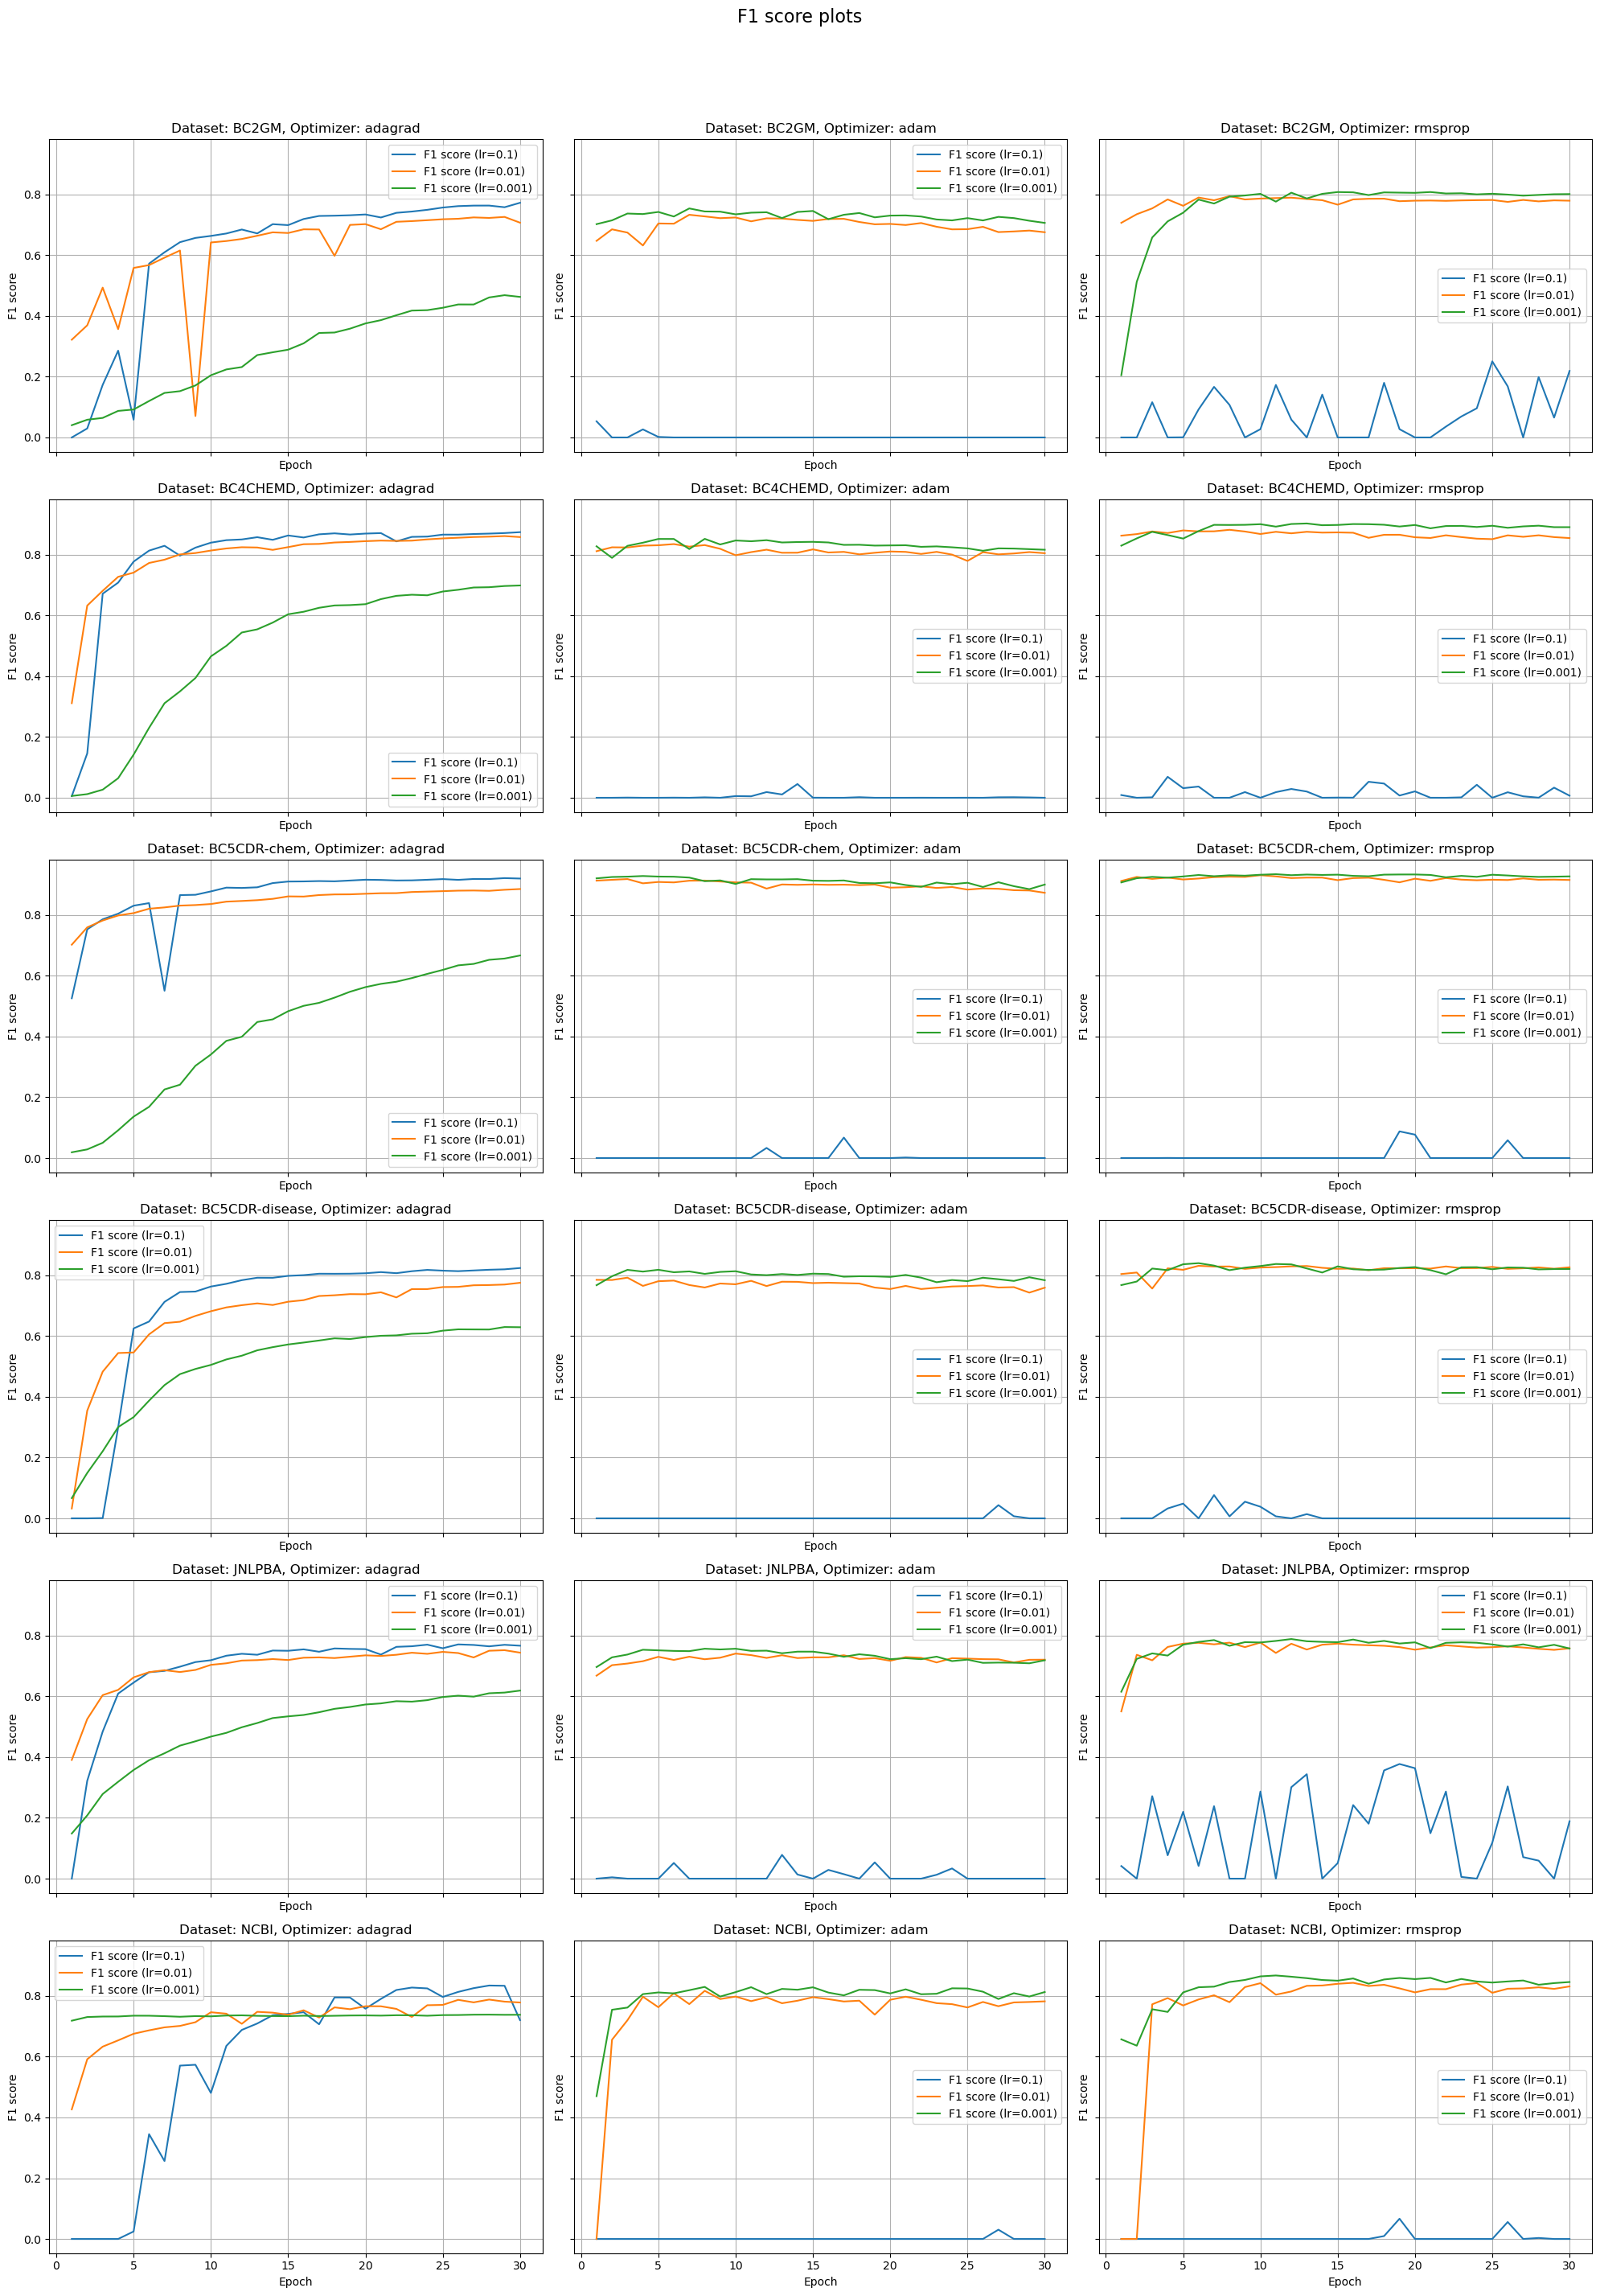

In [10]:
fig, axs = plt.subplots(figsize=(20, 5 * len(datasets)), nrows=len(datasets), ncols=len(optimizers), sharey=True, sharex=True)
plt.suptitle('F1 score plots', fontsize=16)

for j, dataset in enumerate(datasets):
    for i, optimizer in enumerate(optimizers):
        if dataset in data and optimizer in data[dataset]:
            make_loss_plot(data[dataset][optimizer], f'Dataset: {dataset}, Optimizer: {optimizer}', ax=axs[j, i])
            
# Save all plots to pdf
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle
plt.savefig('f1_score_plots.pdf')

In [11]:
data['BC2GM']['rmsprop']['0.001'].keys()

dict_keys(['trainLossList', 'testLossList', 'trainDurationList', 'testDurationList', 'f1ValList', 'precisionValList', 'recallValList', 'maxF1', 'maxF1idx', 'prevF1', 'stop_counter', 'early_stop', 'm_name'])

## Convergence speed plot

In [17]:
optimizer_to_allowed_lrs = {
    'adagrad': ['0.1', '0.01', '0.001'],
    'adam': ['0.01', '0.001'],
    'rmsprop': ['0.01', '0.001']
}

def make_loss_plot(metrics_dict, title, optimizer, ax=None):
    if ax is None:
        plt.figure(figsize=(10, 6))
        
    for learning_rate, metrics in metrics_dict.items():
        if learning_rate not in optimizer_to_allowed_lrs[optimizer]:
            continue
        
        testLossList = metrics['testLossList']
        testDurationList = metrics['testDurationList']
        
        # Normalize testDurationList
        testDurationListMax = max(testDurationList)
        testDurationList = [x / testDurationListMax for x in testDurationList]

        convergence_speed = []
        for i in range(1, len(testLossList)):
            speed = (testLossList[i-1] - testLossList[i]) / testDurationList[i]
            convergence_speed.append(speed)
        
        epochs = list(range(1, len(testLossList) + 1))
        
        label = f'Convergence speed (lr={learning_rate})'
        if ax is None:
            plt.plot(epochs[1:], convergence_speed, label=label)
        else:
            ax.plot(epochs[1:], convergence_speed, label=label)
        
    if ax is None:
        plt.title(title)
        plt.xlabel('Epoch')
        plt.ylabel('Convergence speed')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        ax.set_title(title)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Convergence speed')
        ax.legend()
        ax.grid(True)
    

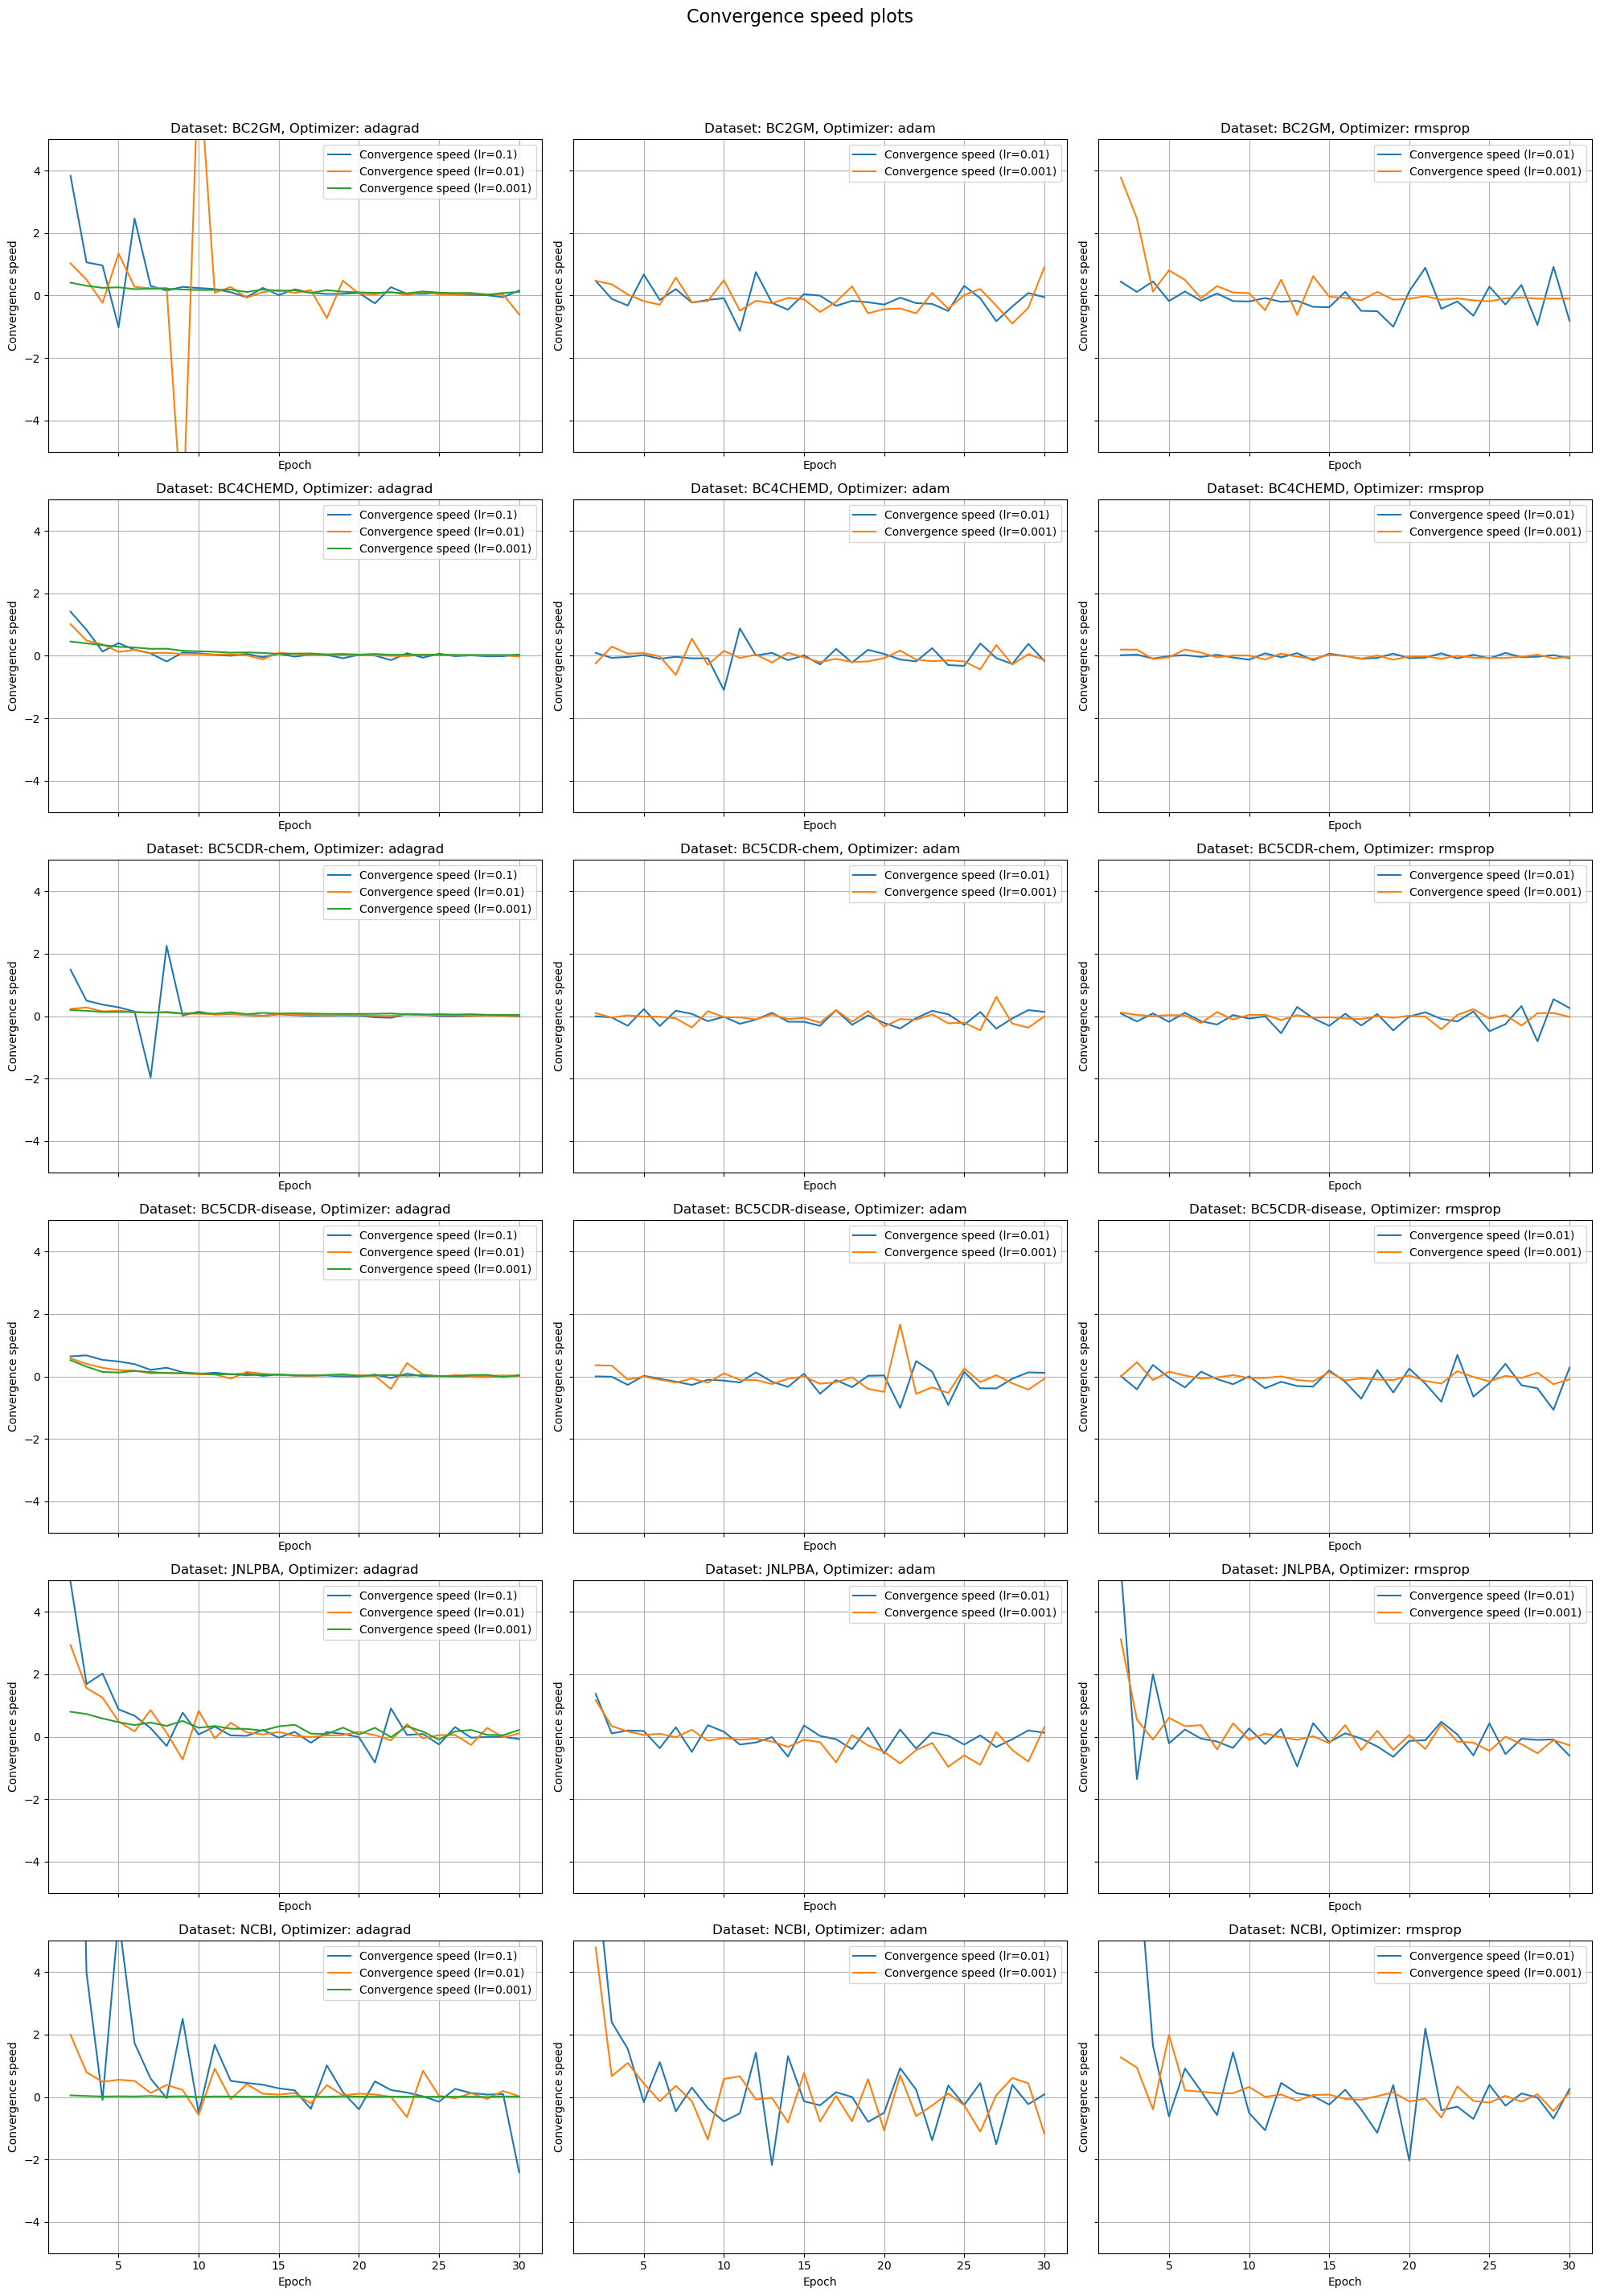

In [18]:
fig, axs = plt.subplots(figsize=(20, 5 * len(datasets)), nrows=len(datasets), ncols=len(optimizers), sharey=True, sharex=True)
plt.suptitle('Convergence speed plots', fontsize=16)

for j, dataset in enumerate(datasets):
    for i, optimizer in enumerate(optimizers):
        if dataset in data and optimizer in data[dataset]:
            make_loss_plot(data[dataset][optimizer], f'Dataset: {dataset}, Optimizer: {optimizer}', optimizer, ax=axs[j, i])
            
# Save all plots to pdf
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle
plt.ylim(-5, 5)
plt.savefig('convergence_speed_plots.pdf')